In [10]:
import plotnine as p9
import polars as pl
import benches.polars_lazy as l

# The Data

In [31]:
plan = pl.scan_csv("price.csv", try_parse_dates=True)
df = plan.fetch(10)
df

uuid,price,date,postcode,type,new build,duration,poan,soan,street,locality,town,district,county,d,e
str,i64,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,str
"""{5BBE9CB3-6332...",42000,1995-12-21 00:00:00,"""NE4 9DN""","""S""","""N""","""F""","""8""","""""","""MATFEN PLACE""","""FENHAM""","""NEWCASTLE UPON...","""NEWCASTLE UPON...","""TYNE AND WEAR""","""A""","""A"""
"""{20E2441A-0F16...",95000,1995-03-03 00:00:00,"""RM16 4UR""","""S""","""N""","""F""","""30""","""""","""HEATH ROAD""","""GRAYS""","""GRAYS""","""THURROCK""","""THURROCK""","""A""","""A"""
"""{D893EE64-4464...",74950,1995-10-03 00:00:00,"""CW10 9ES""","""D""","""Y""","""F""","""15""","""""","""SHROPSHIRE CLO...","""MIDDLEWICH""","""MIDDLEWICH""","""CONGLETON""","""CHESHIRE""","""A""","""A"""
"""{F9F753A8-E56A...",43500,1995-11-14 00:00:00,"""TS23 3LA""","""S""","""N""","""F""","""19""","""""","""SLEDMERE CLOSE...","""BILLINGHAM""","""BILLINGHAM""","""STOCKTON-ON-TE...","""STOCKTON-ON-TE...","""A""","""A"""
"""{E166398A-A19E...",63000,1995-09-08 00:00:00,"""CA25 5QH""","""S""","""N""","""F""","""8""","""""","""CROSSINGS CLOS...","""CLEATOR MOOR""","""CLEATOR MOOR""","""COPELAND""","""CUMBRIA""","""A""","""A"""
"""{A9A3C463-3CA0...",29995,1995-05-12 00:00:00,"""PE14 8JF""","""S""","""N""","""F""","""114""","""""","""SMEETH ROAD""","""ST JOHNS FEN E...","""WISBECH""","""KING'S LYNN AN...","""NORFOLK""","""A""","""A"""
"""{8DE57D57-DDC3...",105000,1995-11-30 00:00:00,"""S6 6TG""","""D""","""N""","""F""","""70""","""""","""WOODSTOCK ROAD...","""LOXLEY""","""SHEFFIELD""","""SHEFFIELD""","""SOUTH YORKSHIR...","""A""","""A"""
"""{568DE11A-432B...",121250,1995-05-19 00:00:00,"""N12 8LR""","""F""","""N""","""L""","""CAVENDISH HOUS...","""FLAT 20""","""WOODSIDE GRANG...","""LONDON""","""LONDON""","""BARNET""","""GREATER LONDON...","""A""","""A"""
"""{F7A5CAE4-BDD3...",43000,1995-12-01 00:00:00,"""LA6 3DQ""","""T""","""N""","""F""","""90""","""""","""NEW VILLAGE""","""INGLETON""","""CARNFORTH""","""CRAVEN""","""NORTH YORKSHIR...","""A""","""A"""


# Examples

## Number Sold

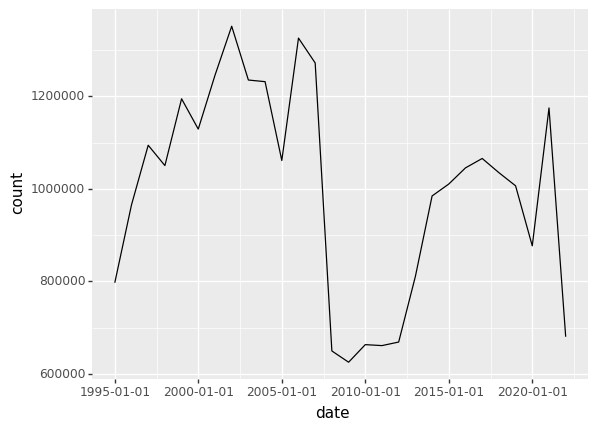

<ggplot: (314356351)>

In [12]:
df = l.n_sold()
p9.ggplot(df) + p9.geom_line(p9.aes(x='date', y='count'))

## Average Price

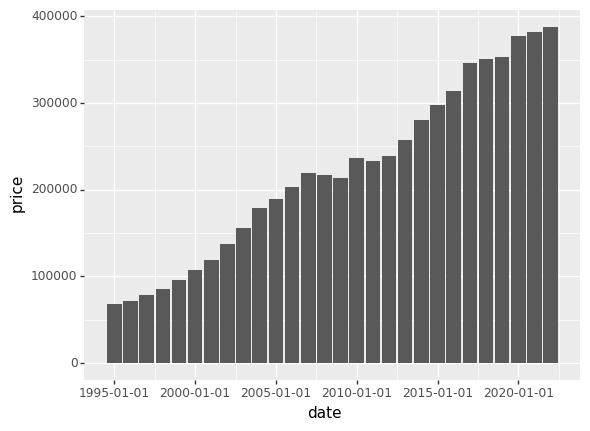

<ggplot: (314260791)>

In [13]:
df = l.price()
p9.ggplot(df) + p9.geom_col(p9.aes(x='date', y='price'))

## Most Expensive Neighbourhoods

In [35]:
df = l.most_expensive()
df

town,district,count,price
str,str,u32,f64
"""LONDON""","""CITY OF LONDON...",692,3.1903e6
"""LONDON""","""CITY OF WESTMI...",8660,2.8991e6
"""LONDON""","""KENSINGTON AND...",6064,2.4304e6
"""LEATHERHEAD""","""ELMBRIDGE""",245,2.0843e6
"""VIRGINIA WATER...","""RUNNYMEDE""",357,2.0079e6
"""LONDON""","""CAMDEN""",6857,1.6375e6
"""NORTHWOOD""","""THREE RIVERS""",139,1.4981e6
"""WINDLESHAM""","""SURREY HEATH""",217,1.3515e6
"""COBHAM""","""ELMBRIDGE""",858,1.2922e6


# Performance

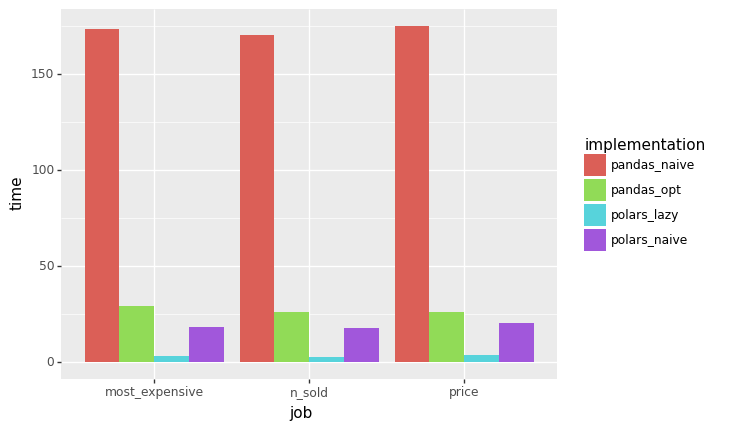

<ggplot: (314477785)>

In [15]:
df = pl.read_csv("results.csv").groupby("implementation","job").mean()
p9.ggplot(df, p9.aes(x="job", y="time", fill="implementation")) + p9.geom_col(stat="identity", position=p9.position_dodge())

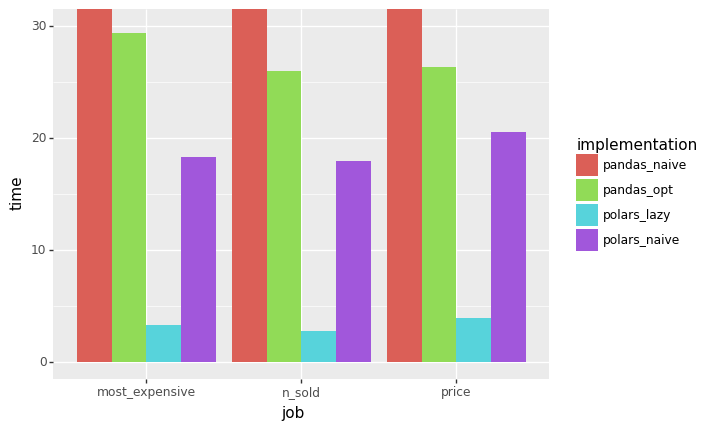

<ggplot: (314355845)>

In [16]:
p9.ggplot(df, p9.aes(x="job", y="time", fill="implementation")) + p9.geom_col(stat="identity", position=p9.position_dodge()) + p9.coord_cartesian(ylim=(0, 30))

# Plans

In [33]:
df = pl.scan_csv("price.csv", try_parse_dates=True)
agg = (
    df
    .filter(pl.col("date").dt.year() >= 2020)
    .select("town", "district", "price")
    .groupby("town", "district")
    .agg(pl.count(), pl.col("price").mean())
    .filter(pl.col("count") >= 100)
    .sort("price", descending=True)
    .limit(10)
)

In [18]:
print(agg.describe_optimized_plan())

  SORT BY [col("price")]
    FILTER [(col("count")) >= (100u32)] FROM
      Aggregate
      	[count(), col("price").mean()] BY [col("town"), col("district")] FROM
      	  FAST_PROJECT: [town, district, price]
    CSV SCAN price.csv
    PROJECT 4/16 COLUMNS
    SELECTION: [(col("date").dt.year()) >= (2020i32)]


